## 6.4 Machine Learning 

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ignore FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Set path
path = r'C:\Users\gered\OneDrive\Desktop\Boat Sales 01.24.A6\Boat Sales 23.01.24'

In [4]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boats_geo.csv'), index_col = False)

### 2. Data cleaning

In [5]:
df.head(20)

,Unnamed: 0,Boat Type,Manufacturer,UsageType,Year Built,Material,Last 7 days views,Country,Price in EUR,Size,Price category
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,none,226,Switzerland,3537,7.6000,Low price
1,1,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,75,Germany,3490,6.0000,Low price
2,2,Sport Boat,Pioner power boats,new boat from stock,2020,none,64,Denmark,3367,3.0000,Low price
3,3,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,58,Germany,3399,5.1830,Low price
4,4,Catamaran,none,"Used boat,Unleaded",1999,Aluminium,474,Switzerland,3816,14.7560,Low price
5,5,Fishing Boat,Crescent power boats,new boat from stock,2019,none,45,Germany,3333,4.9868,Low price
6,6,Pontoon Boat,Whaly power boats,new boat from stock,2018,none,180,Italy,3300,7.5255,Low price
7,7,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,239,Switzerland,3710,7.6125,Low price
8,8,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,69,Italy,3500,9.4000,Low price
9,9,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,113,Switzerland,4876,7.2600,Low price


In [6]:
df.shape

(9198, 11)

In [7]:
df.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'UsageType', 'Year Built',
       'Material', 'Last 7 days views', 'Country', 'Price in EUR', 'Size',
       'Price category'],
      dtype='object')

In [8]:
# Dropping column Unnamed:0 
df = df.drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [9]:
# checking changes
df.head()

,Boat Type,Manufacturer,UsageType,Year Built,Material,Last 7 days views,Country,Price in EUR,Size,Price category
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,none,226,Switzerland,3537,7.600,Low price
1,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,75,Germany,3490,6.000,Low price
2,Sport Boat,Pioner power boats,new boat from stock,2020,none,64,Denmark,3367,3.000,Low price
3,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,58,Germany,3399,5.183,Low price
4,Catamaran,none,"Used boat,Unleaded",1999,Aluminium,474,Switzerland,3816,14.756,Low price


##### Missing values

In [10]:
# Check for missing values

df.isnull().sum()

Boat Type            0
Manufacturer         0
UsageType            0
Year Built           0
Material             0
Last 7 days views    0
Country              0
Price in EUR         0
Size                 0
Price category       0
dtype: int64

##### Duplicates check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape

(9198,)

##### Extreme values checks

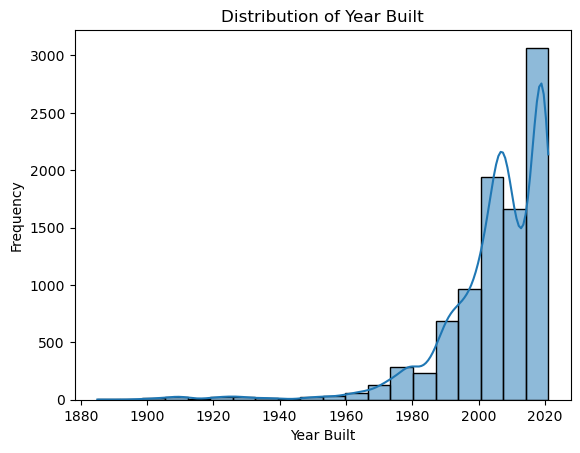

In [14]:
sns.histplot(df['Year Built'], bins=20, kde=True)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

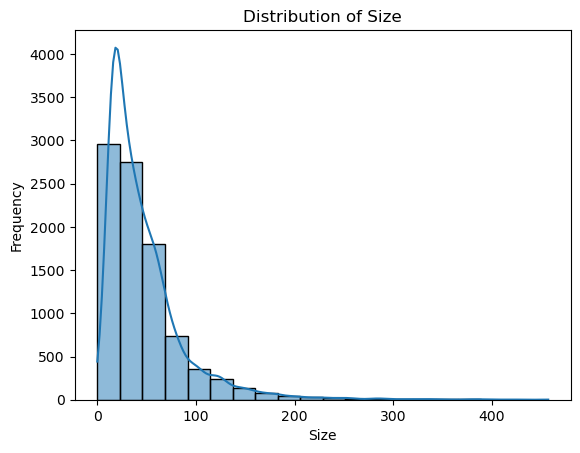

In [15]:
sns.histplot(df['Size'], bins=20, kde=True)
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

C:\Users\gered\AppData\Local\Temp\ipykernel_30592\1511558665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price in EUR'], bins=25)


<Axes: xlabel='Price in EUR', ylabel='Density'>

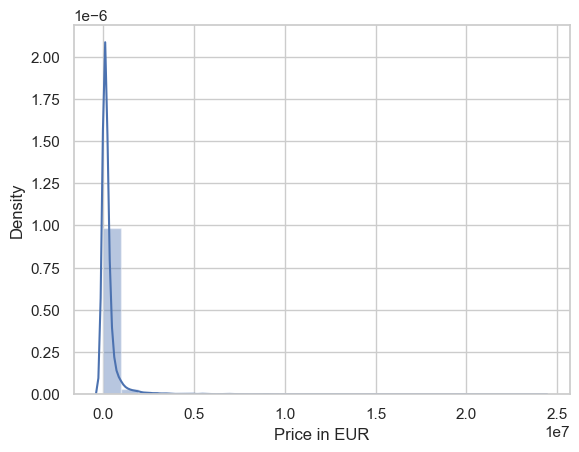

In [17]:
sns.distplot(df['Price in EUR'], bins=25)

C:\Users\gered\AppData\Local\Temp\ipykernel_30592\193184810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Last 7 days views'], bins=25)


<Axes: xlabel='Last 7 days views', ylabel='Density'>

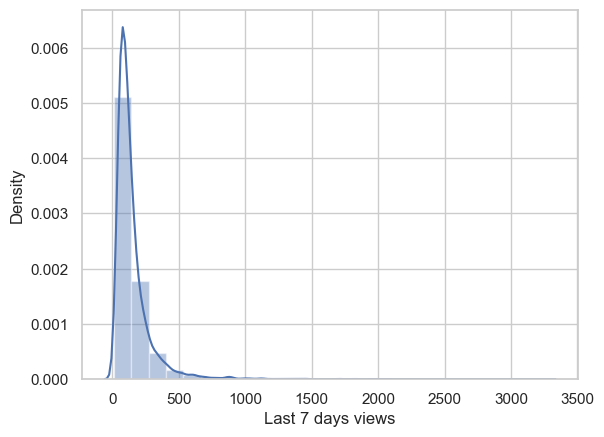

In [18]:
sns.distplot(df['Last 7 days views'], bins=25)

In [19]:
df['Last 7 days views'].mean() # Check the mean

147.44672754946728

In [20]:
df['Last 7 days views'].median() # Check the median

107.0

In [21]:
df['Last 7 days views'].max() # Check the max

3263

### 3. Data prep for regression analysis 

C:\Users\gered\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


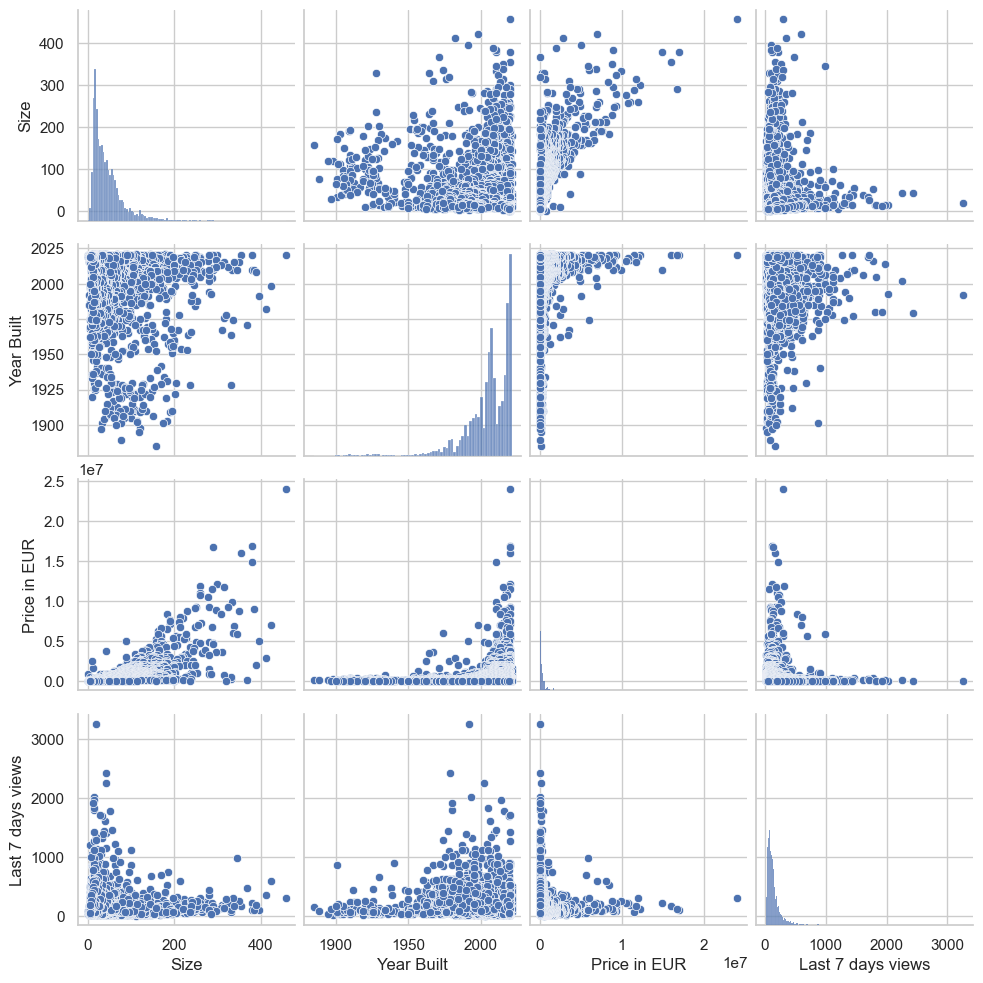

In [22]:
# Select variables of interest
Var_Pair = ['Size', 'Year Built', 'Price in EUR', 'Last 7 days views']

# Filter the DataFrame to include only interested variables
interest_var = df[Var_Pair]

# Create a pair plot
sns.pairplot(interest_var)
plt.show()

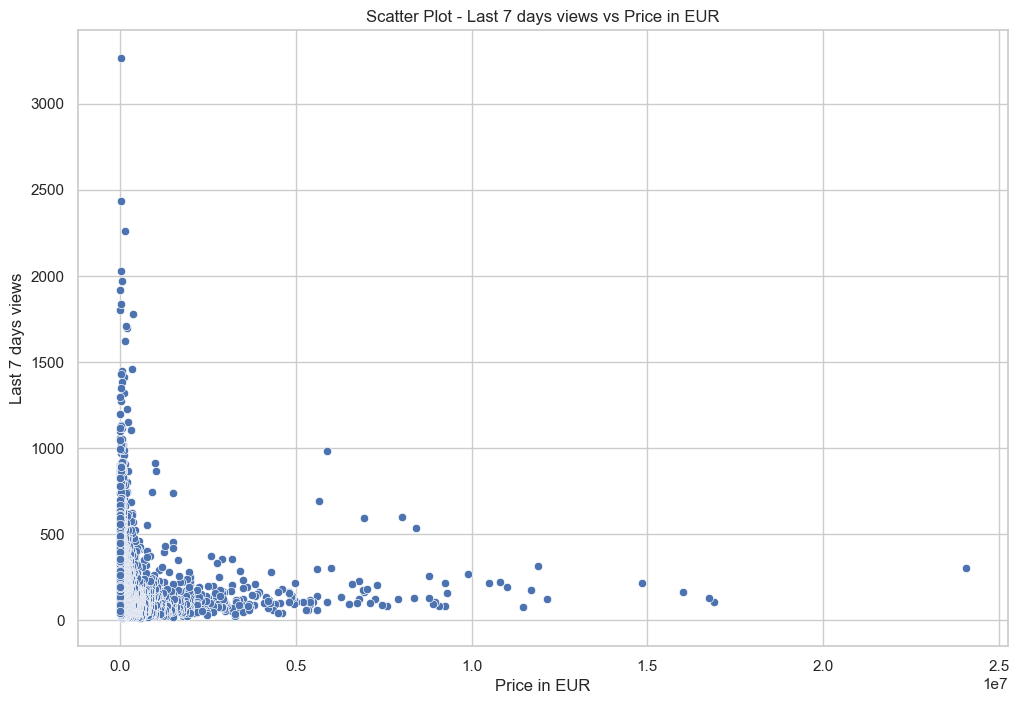

In [23]:
# Scatter plot for Last 7 days views vs Price in EUR
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price in EUR', y='Last 7 days views', data=df)
plt.title('Scatter Plot - Last 7 days views vs Price in EUR')
plt.show()


#### Hypothesis
##### The hypothesis is that specific characteristics of vessels, such as price in EUR, usageType, size, material and country of origin, can significantly influence the number of visits they receive in the last 7 days.

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Price in EUR'].values.reshape(-1,1)
y = df['Last 7 days views'].values.reshape(-1,1)

In [25]:
X

array([[3537],
       [3490],
       [3367],
       ...,
       [4499],
       [4300],
       [4006]], dtype=int64)

In [26]:
y

array([[226],
       [ 75],
       [ 64],
       ...,
       [354],
       [266],
       [194]], dtype=int64)

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

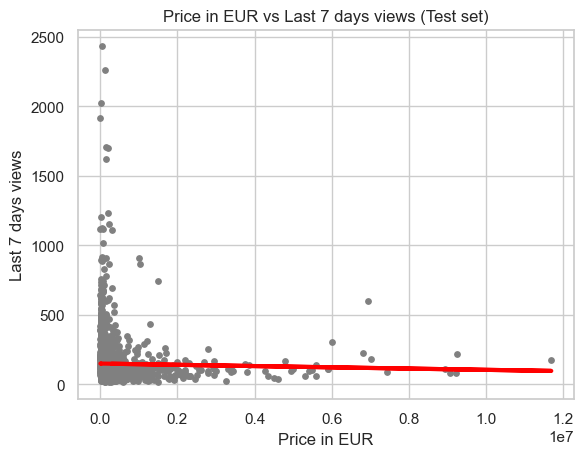

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price in EUR vs Last 7 days views (Test set)')
plot_test.xlabel('Price in EUR')
plot_test.ylabel('Last 7 days views')
plot_test.show()

###### The regression line appears almost horizontal, it suggests that there is very little or no apparent linear relationship between the independent variable and the dependent variable.

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.52819034e-06]]
Mean squared error:  24605.486179369695
R2 score:  0.0020451790670276138


In [34]:
y_predicted

array([[147.73613708],
       [144.5890448 ],
       [147.93990564],
       ...,
       [148.98818171],
       [148.93837161],
       [148.98365352]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,74,147.736137
1,35,144.589045
2,232,147.939906
3,304,121.902811
4,210,148.913376
5,80,148.913467
6,50,147.600291
7,63,147.532369
8,64,146.015425
9,92,147.491615


#### It seems like there is a significant difference between the actual and predicted values. Large differences may indicate that the regression model is not accurately capturing the underlying patterns in the data.

##### Compare how the regression fits the training set

In [36]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.52819034e-06]]
Mean squared error:  21047.839251418172
R2 score:  0.0007629652826208755


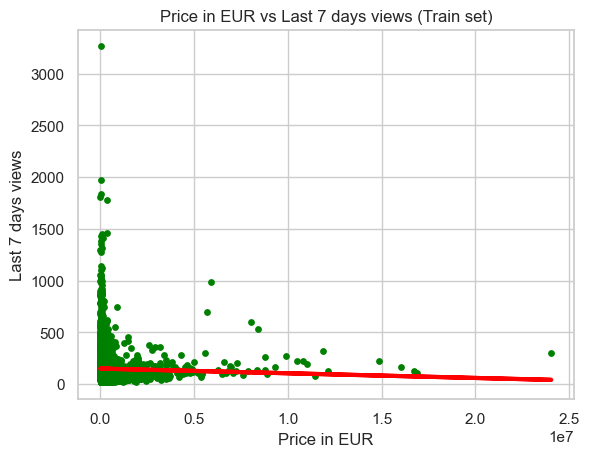

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price in EUR vs Last 7 days views (Train set)')
plot_test.xlabel('Price in EUR')
plot_test.ylabel('Last 7 days views')
plot_test.show()

####  It suggests that for a one-unit increase in the independent variable, the dependent variable decreases by this amount.
#### While the decrease in MSE is a positive sign, the low R2 score indicates that the model is not explaining much of the variability in the data.

### Bonus: performance improvement after removing outliers

In [40]:
# Clean the extreme values from the "Last 7 days views" variable observed during the consistency checks.

df_test = df[df['Last 7 days views'] <=2000] 

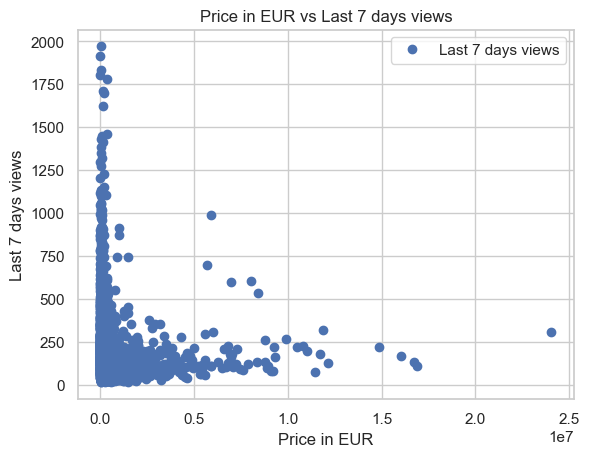

In [41]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Price in EUR', y='Last 7 days views', style='o')  
plt.title('Price in EUR vs Last 7 days views')  
plt.xlabel('Price in EUR')  
plt.ylabel('Last 7 days views')  
plt.show()

In [42]:
# Reshape again.

X_2 = df_test['Price in EUR'].values.reshape(-1,1)
y_2 = df_test['Last 7 days views'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [44]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [46]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5.90515013e-06]]
Mean squared error:  20662.875779971055
R2 score:  0.001262742855626997


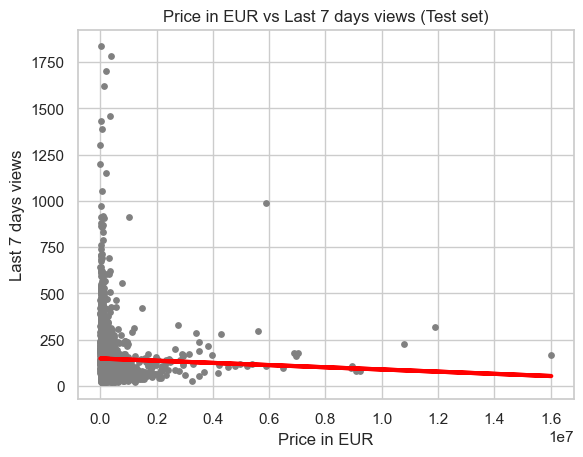

In [48]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Price in EUR vs Last 7 days views (Test set)')
plot_test.xlabel('Price in EUR')
plot_test.ylabel('Last 7 days views')
plot_test.show()

#### The regression line has a slight downward inclination in the "X" direction, more than before visualzation with the outliers, it suggests a negative slope. In the context of linear regression, this means that as the independent variable (X) increases, the predicted value of the dependent variable (y) decreases.

In [49]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,26,146.274835
1,98,147.813126
2,19,147.278710
3,410,147.506058
4,241,142.938425
5,65,146.215783
6,452,148.149720
7,300,148.098410
8,102,147.514916
9,151,147.349572


#### The updated slope is approximately -5.91e-06, indicating the change in the dependent variable for a one-unit change in the independent variable.
#### The MSE is now 20662.88, which is lower than the previous values. A lower MSE is generally a positive sign, as it indicates that the predicted values are closer to the actual values.
#### The R2 score has also improved to 0.00126. While it's still quite low, it's higher than the previous R2 score. Indicates that a small but slightly larger proportion of the variance is explained compared to the previous model.

In [50]:
# Export Data frame
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'boats_regression.csv'))